In [1]:
from snowflake_helper.snowflake_helper import SnowflakeHelper

In [2]:
from BSG_utils import product_visualizer
import pandas as pd
import ast

In [3]:
snowflake_manager = SnowflakeHelper()
QUERY = 'select * from PLAYGROUNDS.ADRIANCAMPOY.ARTICLES_INFO;'
data = snowflake_manager.load_data_from_query(QUERY)

In [4]:
closest_items = pd.read_csv('gs://bsg-image-recommendation/ALBEF/ALBEF_closest_articles_per_product.csv')

In [5]:
closest_items.head()

,id,output
0,PM-29892,"['PM-30619', 'PM-35260', '708474', 'PM-33322',..."
1,PM-29740,"['PM-38188', 'PM-27632', 'PM-27627', '729063',..."
2,PM-29741,"['PM-29739', 'PM-38188', 'PM-38191', 'PM-28694..."
3,PM-29884,"['PM-29885', 'PM-33075', 'PM-41766', 'PM-36813..."
4,PM-29730,"['PM-39149', 'PM-30613', 'PM-42670', 'PM-39210..."


In [6]:
data.keys()

Index(['display_product_id', 'product_no', 'country_code', 'title',
       'description', 'product_group', 'product_group_level_1_description',
       'product_group_level_2_description',
       'product_group_level_3_description', 'collection', 'brand', 'gender',
       'brand_segment', 'base_colour', 'average_price', 'average_cost_sek',
       'average_gp2_sek', 'quantity_sold', 'images_link', 'max_age',
       'min_age'],
      dtype='object')

In [7]:
data = data[data['country_code']=='SE']

In [19]:
article_to_get_recommendations_from = '637893'

main_article_data = data[data['product_no']==article_to_get_recommendations_from]
recommended_products = closest_items[closest_items['id']==article_to_get_recommendations_from]['output'].tolist()
recommended_products = ast.literal_eval(recommended_products[0])
article_numbers_data = data[data['product_no'].isin(recommended_products)]

In [20]:
article_numbers_data['scoring'] = 0

# Checking for same category
if main_article_data['product_group_level_3_description'] is not None:
    article_numbers_data.loc[article_numbers_data['product_group_level_3_description'].isin(
        main_article_data['product_group_level_3_description'].tolist()), 'scoring'] += 1

if main_article_data['product_group_level_2_description'] is not None:
    article_numbers_data.loc[article_numbers_data['product_group_level_2_description'].isin(
        main_article_data['product_group_level_2_description'].tolist()), 'scoring'] += 1
    
# Checking for same brand
article_numbers_data.loc[article_numbers_data['brand'].isin(main_article_data['brand'].tolist()), 'scoring'] += 1

#Checking for same colour
article_numbers_data.loc[article_numbers_data['base_colour'].isin(main_article_data['base_colour'].tolist()), 'scoring'] += 0.5

/var/folders/2n/ct3fgq516b158h6zx5s586640000gn/T/ipykernel_4659/1339379443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_numbers_data['scoring'] = 0


In [21]:
article_numbers_data = article_numbers_data.sort_values(by='scoring', ascending=False)

In [22]:
recommended_products = article_numbers_data['product_no'].tolist()
article_titles = article_numbers_data['title'].tolist()
article_images = article_numbers_data['images_link'].tolist()
avg_prices = article_numbers_data['average_price'].tolist()
article_brands = article_numbers_data['brand'].tolist()

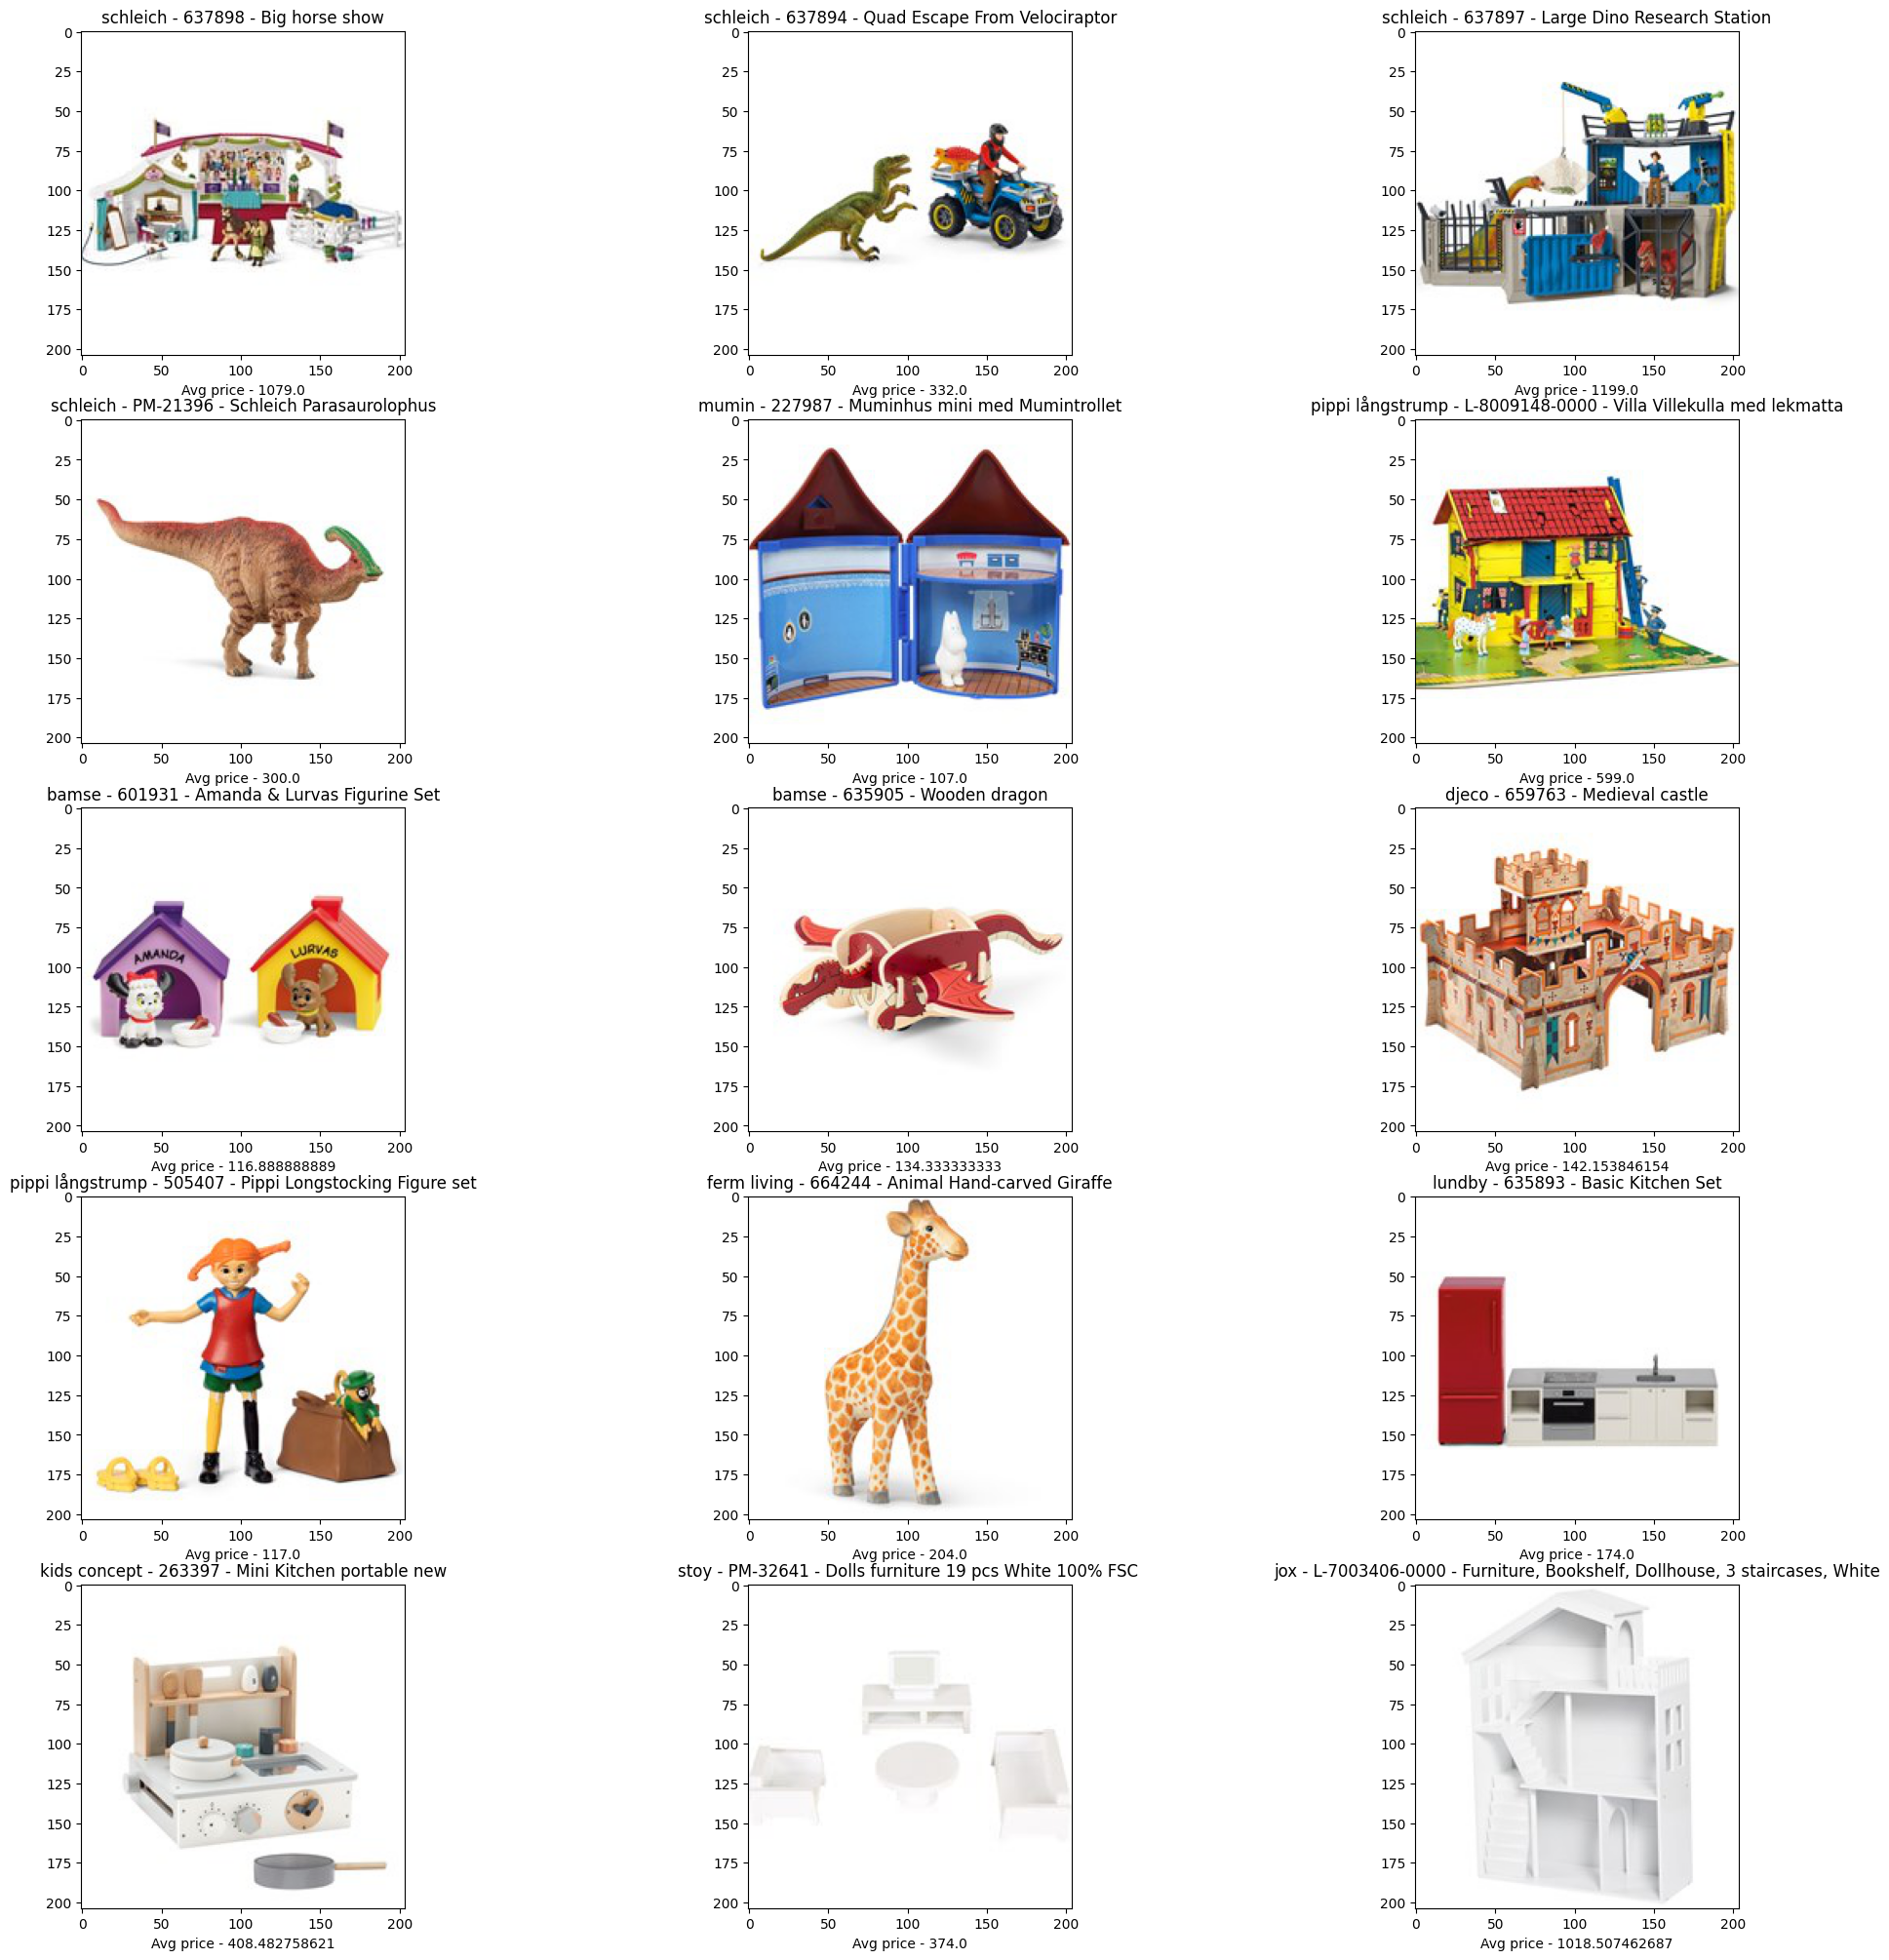

In [23]:
product_visualizer(article_numbers = recommended_products, article_brands = article_brands, article_titles = article_titles, article_images = article_images, avg_prices=avg_prices, n_rows=5, n_cols=3)
